In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [22]:
DATA_FOLDER  = '../data/'
top_df = pd.read_csv(DATA_FOLDER + 'aisdk-2023-04-20.csv',nrows=100000)


In [23]:
sampled_df = pd.read_csv(DATA_FOLDER + 'sampled1-aisdk-2023-04-20.csv',header=None,names=top_df.columns)



In [24]:
top_df['MMSI'].unique()[0]

218768000

In [25]:
sampled_df['MMSI'].unique()[0]

636018086

In [86]:
mmsi1 = top_df['MMSI'].unique()[312]
boat_top = top_df[top_df['MMSI'] == mmsi1]
target_time = max(boat_top['# Timestamp'])
boat_sample = sampled_df[(sampled_df['MMSI'] == mmsi1) ]
#& (sampled_df['# Timestamp'] < target_time)

In [91]:
central_lat = (boat_sample['Latitude'].max() + boat_sample['Latitude'].min()) / 2
central_lon = (boat_sample['Longitude'].max() + boat_sample['Longitude'].min()) / 2

# Calculate the maximum absolute difference between latitude and longitude
lat_diff = boat_sample['Latitude'].max() - boat_sample['Latitude'].min()
lon_diff = boat_sample['Longitude'].max() - boat_sample['Longitude'].min()
max_diff = max(lat_diff, lon_diff)

# Add extra space (adjust as needed)
extra_space = 0.1  # Adjust this value for the desired extra space

# Calculate the width and height of the map with extra space
width = max_diff + 2 * extra_space
height = max_diff + 2 * extra_space

# Calculate the new map boundaries with extra space
llcrnrlat = central_lat - height / 2
urcrnrlat = central_lat + height / 2
llcrnrlon = central_lon - width / 2
urcrnrlon = central_lon + width / 2

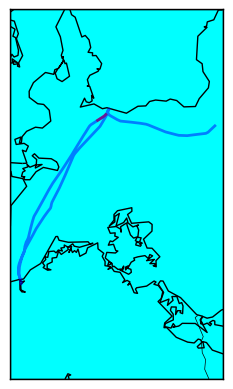

In [92]:
# Create a Basemap instance with calculated boundaries
map = Basemap(projection='merc', resolution='i', llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon)

# Draw a map background
map.drawcoastlines()
map.drawcountries()
map.drawmapboundary(fill_color='aqua')

# Convert latitude and longitude to map coordinates
x, y = map(boat_top['Longitude'].values, boat_top['Latitude'].values)

x2, y2 = map(boat_sample['Longitude'].values, boat_sample['Latitude'].values)
# Plot the path
map.plot(x, y, marker=None, color='red', linewidth=2, alpha=0.8)
map.plot(x2, y2, marker=None, color='blue', linewidth=2, alpha=0.5)

# Show the map
plt.show()


In [120]:
 #Set the central latitude and longitude for Denmark
central_lat = 56.2639
central_lon = 9.5018

# Define the boundaries for Denmark and surrounding waters
llcrnrlat = 53.0  # Lower-left corner latitude
urcrnrlat = 59.0  # Upper-right corner latitude
llcrnrlon = 5.0   # Lower-left corner longitude
urcrnrlon = 15.0  # Upper-right corner longitude

In [138]:
def add_route(map,df):

    mmsis = df['MMSI'].unique()

    for mmsi in mmsis:
        mmsi_df = df[df['MMSI'] == mmsi]
            
        # Convert latitude and longitude to map coordinates
        x, y = map(mmsi_df['Longitude'].values, mmsi_df['Latitude'].values)
        map.plot(x, y, marker=None, color='red', linewidth=2, alpha=0.08)


In [139]:
cleaned_df = sampled_df[(sampled_df['Latitude'] >= llcrnrlat) & (sampled_df['Latitude'] <= urcrnrlat) &
                  (sampled_df['Longitude'] >= llcrnrlon) & (sampled_df['Longitude'] <= urcrnrlon)]


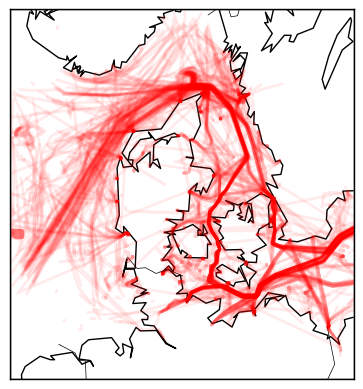

In [140]:
# Create a Basemap instance with calculated boundaries
map = Basemap(projection='merc', resolution='l', llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon)


# Draw a map background
map.drawcoastlines()
map.drawcountries()
map.drawmapboundary(fill_color='white')

add_route(map,cleaned_df)

# Show the map
plt.show()

In [116]:
urcrnrlat

90.14759999999998